# 1. Install and Import Dependencies





In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [ ]:
from google.colab import drive
drive.mount('/content/drive/obj_train_data')

In [19]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [20]:
!cd yolov5 && pip install -qr requirements.txt


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::aiohttp==3.8.1=py39h2bbff1b_1
  - defaults/noarch::aiosignal==1.2.0=pyhd3eb1b0_0
  - defaults/noarch::alabaster==0.7.12=pyhd3eb1b0_0
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda==custom=py39_1
  - defaults/win-64::anaconda-navigator==2.1.4=py39haa95532_0
  - defaults/noarch::anaconda-project==0.10.2=pyhd3eb1b0_0
  - defaults/win-64::anyio==3.5.0=py39haa95532_0
  - defaults/noarch::appdirs==1.4.4=pyhd3eb1b0_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/win-64::argon2-cffi-bindings==21.2.0=py39h2bbff1b_0
  - defaults/noarch::arrow==1.2.2=pyhd3eb1b0_0
  - defaults/win-64::astroid==2.6.6=py39haa95532_0
  - defaults/win-64::astropy==5.0.4=py39h080aedc_0
  - defaults/noarch::asttokens==2.0.5=pyhd3eb1b0_0
  - defaults/noarch::async-timeout==4.0.1=pyhd3eb1b0_0
  - defaults/noarch:

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 


In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

OSError: [WinError 1455] Le fichier de pagination est insuffisant pour terminer cette opération. Error loading "C:\Users\msi\anaconda3\envs\tensorflow\lib\site-packages\torch\lib\cudnn_adv_infer64_8.dll" or one of its dependencies.

# 2. Load Model

In [22]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\msi/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv5 requirements "scipy>=1.4.1" "seaborn>=0.11.0" not found, attempting AutoUpdate...

requirements: 2 packages updated per C:\Users\msi\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-2-27 Python-3.9.12 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [ ]:
img = '9.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 168x300 2 persons, 5 bottles
Speed: 40.9ms pre-process, 23.7ms inference, 5.2ms NMS per image at shape (1, 3, 384, 640)


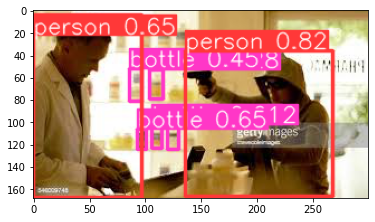

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[216, 203, 150],
         [230, 217, 165],
         [225, 211, 162],
         ...,
         [138, 117,  52],
         [138, 117,  52],
         [138, 117,  52]],
 
        [[223, 208, 153],
         [219, 203, 151],
         [211, 198, 146],
         ...,
         [150, 125,  61],
         [150, 125,  61],
         [150, 125,  61]],
 
        [[227, 175, 129],
         [221, 138, 104],
         [223, 139, 105],
         ...,
         [163, 131,  70],
         [163, 131,  70],
         [163, 131,  70]],
 
        ...,
 
        [[255,  56,  56],
         [255,  56,  56],
         [203,  68,  48],
         ...,
         [223, 222, 202],
         [223, 222, 202],
         [224, 223, 203]],
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [222, 221, 201],
         [222, 221, 201],
         [223, 222, 202]],
 
        [[255,  56,  56],
         [255,  56,  56],
         [255,  56,  56],
         ...,
         [221, 220, 200],
  

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [36]:
import uuid   # Unique identifier
import os
import time

In [24]:
IMAGES_PATH = os.path.join('dataset', 'images') #/data/images
labels = ['pistol', 'knife', 'fire']
number_imgs = 5200

In [8]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

dataset\images\pistol.00fc1d12-c31d-11ed-a4f1-f057a6f09c40.jpg


In [10]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

dataset\images\pistol.09c160fb-c31d-11ed-ab38-f057a6f09c40.jpg
dataset\images\pistol.09c160fc-c31d-11ed-a05a-f057a6f09c40.jpg
dataset\images\pistol.09c160fd-c31d-11ed-bc98-f057a6f09c40.jpg
dataset\images\pistol.09c160fe-c31d-11ed-b9fa-f057a6f09c40.jpg
dataset\images\pistol.09c160ff-c31d-11ed-b387-f057a6f09c40.jpg
dataset\images\pistol.09c16100-c31d-11ed-83c6-f057a6f09c40.jpg
dataset\images\pistol.09c16101-c31d-11ed-8e62-f057a6f09c40.jpg
dataset\images\pistol.09c16102-c31d-11ed-a135-f057a6f09c40.jpg
dataset\images\pistol.09c16103-c31d-11ed-9f84-f057a6f09c40.jpg
dataset\images\pistol.09c16104-c31d-11ed-8060-f057a6f09c40.jpg
dataset\images\pistol.09c16105-c31d-11ed-b515-f057a6f09c40.jpg
dataset\images\pistol.09c16106-c31d-11ed-9f49-f057a6f09c40.jpg
dataset\images\pistol.09c16107-c31d-11ed-ae02-f057a6f09c40.jpg
dataset\images\pistol.09c19be7-c31d-11ed-9f4b-f057a6f09c40.jpg
dataset\images\pistol.09c19be8-c31d-11ed-8f78-f057a6f09c40.jpg
dataset\images\pistol.09c1ea45-c31d-11ed-b057-f057a6f09

dataset\images\pistol.0b64bb0c-c31d-11ed-ab5e-f057a6f09c40.jpg
dataset\images\pistol.0b64bb0d-c31d-11ed-8957-f057a6f09c40.jpg
dataset\images\pistol.0b64bb0e-c31d-11ed-b24b-f057a6f09c40.jpg
dataset\images\pistol.0b64bb0f-c31d-11ed-b218-f057a6f09c40.jpg
dataset\images\pistol.0b64bb10-c31d-11ed-bf87-f057a6f09c40.jpg
dataset\images\pistol.0b64bb11-c31d-11ed-882b-f057a6f09c40.jpg
dataset\images\pistol.0b64bb12-c31d-11ed-82bc-f057a6f09c40.jpg
dataset\images\pistol.0b64bb13-c31d-11ed-a41d-f057a6f09c40.jpg
dataset\images\pistol.0b64bb14-c31d-11ed-b0b7-f057a6f09c40.jpg
dataset\images\pistol.0b64bb15-c31d-11ed-8479-f057a6f09c40.jpg
dataset\images\pistol.0b660787-c31d-11ed-b081-f057a6f09c40.jpg
dataset\images\pistol.0b660788-c31d-11ed-aa78-f057a6f09c40.jpg
dataset\images\pistol.0b660789-c31d-11ed-97cb-f057a6f09c40.jpg
dataset\images\pistol.0b66078a-c31d-11ed-a84c-f057a6f09c40.jpg
dataset\images\pistol.0b662e84-c31d-11ed-880b-f057a6f09c40.jpg
dataset\images\pistol.0b662e85-c31d-11ed-b8a2-f057a6f09

dataset\images\pistol.0b8005a5-c31d-11ed-b354-f057a6f09c40.jpg
dataset\images\pistol.0b8005a6-c31d-11ed-9bda-f057a6f09c40.jpg
dataset\images\pistol.0b8005a7-c31d-11ed-8fce-f057a6f09c40.jpg
dataset\images\pistol.0b8005a8-c31d-11ed-93db-f057a6f09c40.jpg
dataset\images\pistol.0b8005a9-c31d-11ed-b8ab-f057a6f09c40.jpg
dataset\images\pistol.0b8005aa-c31d-11ed-8ae4-f057a6f09c40.jpg
dataset\images\pistol.0b8005ab-c31d-11ed-83a3-f057a6f09c40.jpg
dataset\images\pistol.0b8005ac-c31d-11ed-ab0c-f057a6f09c40.jpg
dataset\images\pistol.0b802c4d-c31d-11ed-9733-f057a6f09c40.jpg
dataset\images\pistol.0b802c4e-c31d-11ed-8aec-f057a6f09c40.jpg
dataset\images\pistol.0b802c4f-c31d-11ed-a5db-f057a6f09c40.jpg
dataset\images\pistol.0b802c50-c31d-11ed-a89a-f057a6f09c40.jpg
dataset\images\pistol.0b802c51-c31d-11ed-b320-f057a6f09c40.jpg
dataset\images\pistol.0b802c52-c31d-11ed-b1d1-f057a6f09c40.jpg
dataset\images\pistol.0b802c53-c31d-11ed-932b-f057a6f09c40.jpg
dataset\images\pistol.0b802c54-c31d-11ed-b2f1-f057a6f09

dataset\images\pistol.0b9c7e55-c31d-11ed-8d34-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e56-c31d-11ed-a906-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e57-c31d-11ed-ace4-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e58-c31d-11ed-a1b6-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e59-c31d-11ed-a092-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5a-c31d-11ed-9a33-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5b-c31d-11ed-be00-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5c-c31d-11ed-845c-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5d-c31d-11ed-b6b1-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5e-c31d-11ed-9550-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e5f-c31d-11ed-8d69-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e60-c31d-11ed-86d1-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e61-c31d-11ed-928d-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e62-c31d-11ed-8056-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e63-c31d-11ed-95ed-f057a6f09c40.jpg
dataset\images\pistol.0b9c7e64-c31d-11ed-a164-f057a6f09

dataset\images\pistol.0bb9255f-c31d-11ed-a5ea-f057a6f09c40.jpg
dataset\images\pistol.0bb92560-c31d-11ed-9712-f057a6f09c40.jpg
dataset\images\pistol.0bb92561-c31d-11ed-b979-f057a6f09c40.jpg
dataset\images\pistol.0bb92562-c31d-11ed-9632-f057a6f09c40.jpg
dataset\images\pistol.0bb92563-c31d-11ed-a1e5-f057a6f09c40.jpg
dataset\images\pistol.0bb92564-c31d-11ed-b9c2-f057a6f09c40.jpg
dataset\images\pistol.0bb92565-c31d-11ed-997c-f057a6f09c40.jpg
dataset\images\pistol.0bb92566-c31d-11ed-ac1f-f057a6f09c40.jpg
dataset\images\pistol.0bb92567-c31d-11ed-9f7f-f057a6f09c40.jpg
dataset\images\pistol.0bb92568-c31d-11ed-8a08-f057a6f09c40.jpg
dataset\images\pistol.0bb92569-c31d-11ed-a629-f057a6f09c40.jpg
dataset\images\pistol.0bb9256a-c31d-11ed-b36d-f057a6f09c40.jpg
dataset\images\pistol.0bb9256b-c31d-11ed-a6c6-f057a6f09c40.jpg
dataset\images\pistol.0bb9256c-c31d-11ed-93da-f057a6f09c40.jpg
dataset\images\pistol.0bb939e8-c31d-11ed-8f7d-f057a6f09c40.jpg
dataset\images\pistol.0bb939e9-c31d-11ed-a1f1-f057a6f09

dataset\images\knife.0bd582e3-c31d-11ed-a908-f057a6f09c40.jpg
dataset\images\knife.0bd582e4-c31d-11ed-8e1a-f057a6f09c40.jpg
dataset\images\knife.0bd582e5-c31d-11ed-bd39-f057a6f09c40.jpg
dataset\images\knife.0bd582e6-c31d-11ed-acc8-f057a6f09c40.jpg
dataset\images\knife.0bd5a9f9-c31d-11ed-97bf-f057a6f09c40.jpg
dataset\images\knife.0bd5a9fa-c31d-11ed-be0f-f057a6f09c40.jpg
dataset\images\knife.0bd5a9fb-c31d-11ed-a43d-f057a6f09c40.jpg
dataset\images\knife.0bd5a9fc-c31d-11ed-bdba-f057a6f09c40.jpg
dataset\images\knife.0bd5a9fd-c31d-11ed-9d70-f057a6f09c40.jpg
dataset\images\knife.0bd5a9fe-c31d-11ed-80e1-f057a6f09c40.jpg
dataset\images\knife.0bd5a9ff-c31d-11ed-a584-f057a6f09c40.jpg
dataset\images\knife.0bd5aa00-c31d-11ed-9390-f057a6f09c40.jpg
dataset\images\knife.0bd5aa01-c31d-11ed-8e88-f057a6f09c40.jpg
dataset\images\knife.0bd5aa02-c31d-11ed-b81c-f057a6f09c40.jpg
dataset\images\knife.0bd5aa03-c31d-11ed-a865-f057a6f09c40.jpg
dataset\images\knife.0bd5aa04-c31d-11ed-9725-f057a6f09c40.jpg
dataset\

dataset\images\knife.0bf224da-c31d-11ed-aadc-f057a6f09c40.jpg
dataset\images\knife.0bf224db-c31d-11ed-9a1e-f057a6f09c40.jpg
dataset\images\knife.0bf224dc-c31d-11ed-a191-f057a6f09c40.jpg
dataset\images\knife.0bf224dd-c31d-11ed-a16a-f057a6f09c40.jpg
dataset\images\knife.0bf24be9-c31d-11ed-bc8f-f057a6f09c40.jpg
dataset\images\knife.0bf24bea-c31d-11ed-a238-f057a6f09c40.jpg
dataset\images\knife.0bf24beb-c31d-11ed-85ec-f057a6f09c40.jpg
dataset\images\knife.0bf24bec-c31d-11ed-a584-f057a6f09c40.jpg
dataset\images\knife.0bf24bed-c31d-11ed-960e-f057a6f09c40.jpg
dataset\images\knife.0bf24bee-c31d-11ed-986c-f057a6f09c40.jpg
dataset\images\knife.0bf24bef-c31d-11ed-8e93-f057a6f09c40.jpg
dataset\images\knife.0bf24bf0-c31d-11ed-8703-f057a6f09c40.jpg
dataset\images\knife.0bf24bf1-c31d-11ed-8cce-f057a6f09c40.jpg
dataset\images\knife.0bf24bf2-c31d-11ed-ba34-f057a6f09c40.jpg
dataset\images\knife.0bf24bf3-c31d-11ed-b86a-f057a6f09c40.jpg
dataset\images\knife.0bf24bf4-c31d-11ed-98e6-f057a6f09c40.jpg
dataset\

dataset\images\knife.0c0f26c6-c31d-11ed-8f2d-f057a6f09c40.jpg
dataset\images\knife.0c0f26c7-c31d-11ed-bd78-f057a6f09c40.jpg
dataset\images\knife.0c0f26c8-c31d-11ed-b8b9-f057a6f09c40.jpg
dataset\images\knife.0c0f26c9-c31d-11ed-b41b-f057a6f09c40.jpg
dataset\images\knife.0c0f26ca-c31d-11ed-9be1-f057a6f09c40.jpg
dataset\images\knife.0c0f26cb-c31d-11ed-a533-f057a6f09c40.jpg
dataset\images\knife.0c0f26cc-c31d-11ed-bae1-f057a6f09c40.jpg
dataset\images\knife.0c0f26cd-c31d-11ed-9343-f057a6f09c40.jpg
dataset\images\knife.0c0f26ce-c31d-11ed-af53-f057a6f09c40.jpg
dataset\images\knife.0c0f4d90-c31d-11ed-a347-f057a6f09c40.jpg
dataset\images\knife.0c0f4d91-c31d-11ed-aa31-f057a6f09c40.jpg
dataset\images\knife.0c0f4d92-c31d-11ed-a4ad-f057a6f09c40.jpg
dataset\images\knife.0c0f4d93-c31d-11ed-b808-f057a6f09c40.jpg
dataset\images\knife.0c0f4d94-c31d-11ed-a674-f057a6f09c40.jpg
dataset\images\knife.0c0f4d95-c31d-11ed-ba53-f057a6f09c40.jpg
dataset\images\knife.0c0f4d96-c31d-11ed-991d-f057a6f09c40.jpg
dataset\

dataset\images\knife.0c2b6207-c31d-11ed-bd4f-f057a6f09c40.jpg
dataset\images\knife.0c2b6208-c31d-11ed-a713-f057a6f09c40.jpg
dataset\images\knife.0c2b6209-c31d-11ed-a51c-f057a6f09c40.jpg
dataset\images\knife.0c2b620a-c31d-11ed-8f0c-f057a6f09c40.jpg
dataset\images\knife.0c2b620b-c31d-11ed-b6aa-f057a6f09c40.jpg
dataset\images\knife.0c2b620c-c31d-11ed-839c-f057a6f09c40.jpg
dataset\images\knife.0c2b620d-c31d-11ed-a4ee-f057a6f09c40.jpg
dataset\images\knife.0c2b620e-c31d-11ed-9af0-f057a6f09c40.jpg
dataset\images\knife.0c2b620f-c31d-11ed-9f06-f057a6f09c40.jpg
dataset\images\knife.0c2b8913-c31d-11ed-b0ac-f057a6f09c40.jpg
dataset\images\knife.0c2b8914-c31d-11ed-95b9-f057a6f09c40.jpg
dataset\images\knife.0c2b8915-c31d-11ed-b6f6-f057a6f09c40.jpg
dataset\images\knife.0c2b8916-c31d-11ed-b39f-f057a6f09c40.jpg
dataset\images\knife.0c2b8917-c31d-11ed-8ade-f057a6f09c40.jpg
dataset\images\knife.0c2b8918-c31d-11ed-b00c-f057a6f09c40.jpg
dataset\images\knife.0c2b8919-c31d-11ed-b3da-f057a6f09c40.jpg
dataset\

dataset\images\fire.0c48247d-c31d-11ed-b117-f057a6f09c40.jpg
dataset\images\fire.0c48247e-c31d-11ed-87c2-f057a6f09c40.jpg
dataset\images\fire.0c48247f-c31d-11ed-98bc-f057a6f09c40.jpg
dataset\images\fire.0c482480-c31d-11ed-9849-f057a6f09c40.jpg
dataset\images\fire.0c482481-c31d-11ed-9ef6-f057a6f09c40.jpg
dataset\images\fire.0c482482-c31d-11ed-b99c-f057a6f09c40.jpg
dataset\images\fire.0c482483-c31d-11ed-9d15-f057a6f09c40.jpg
dataset\images\fire.0c482484-c31d-11ed-b47f-f057a6f09c40.jpg
dataset\images\fire.0c482485-c31d-11ed-a68c-f057a6f09c40.jpg
dataset\images\fire.0c482486-c31d-11ed-a673-f057a6f09c40.jpg
dataset\images\fire.0c482487-c31d-11ed-9e94-f057a6f09c40.jpg
dataset\images\fire.0c482488-c31d-11ed-a7b0-f057a6f09c40.jpg
dataset\images\fire.0c482489-c31d-11ed-9829-f057a6f09c40.jpg
dataset\images\fire.0c48248a-c31d-11ed-98c8-f057a6f09c40.jpg
dataset\images\fire.0c48248b-c31d-11ed-8139-f057a6f09c40.jpg
dataset\images\fire.0c48248c-c31d-11ed-981f-f057a6f09c40.jpg
dataset\images\fire.0c48

dataset\images\fire.0c649fd6-c31d-11ed-b605-f057a6f09c40.jpg
dataset\images\fire.0c649fd7-c31d-11ed-a06c-f057a6f09c40.jpg
dataset\images\fire.0c649fd8-c31d-11ed-a442-f057a6f09c40.jpg
dataset\images\fire.0c649fd9-c31d-11ed-a2f1-f057a6f09c40.jpg
dataset\images\fire.0c649fda-c31d-11ed-8994-f057a6f09c40.jpg
dataset\images\fire.0c649fdb-c31d-11ed-a7fb-f057a6f09c40.jpg
dataset\images\fire.0c64c684-c31d-11ed-b928-f057a6f09c40.jpg
dataset\images\fire.0c64c685-c31d-11ed-b62c-f057a6f09c40.jpg
dataset\images\fire.0c64c686-c31d-11ed-a4c3-f057a6f09c40.jpg
dataset\images\fire.0c64c687-c31d-11ed-a441-f057a6f09c40.jpg
dataset\images\fire.0c64c688-c31d-11ed-aebc-f057a6f09c40.jpg
dataset\images\fire.0c64c689-c31d-11ed-bae9-f057a6f09c40.jpg
dataset\images\fire.0c64c68a-c31d-11ed-9209-f057a6f09c40.jpg
dataset\images\fire.0c64c68b-c31d-11ed-8675-f057a6f09c40.jpg
dataset\images\fire.0c653bc6-c31d-11ed-9186-f057a6f09c40.jpg
dataset\images\fire.0c653bc7-c31d-11ed-9315-f057a6f09c40.jpg
dataset\images\fire.0c65

dataset\images\fire.0c80c140-c31d-11ed-8ef8-f057a6f09c40.jpg
dataset\images\fire.0c814ad4-c31d-11ed-b6c1-f057a6f09c40.jpg
dataset\images\fire.0c814ad5-c31d-11ed-b9c9-f057a6f09c40.jpg
dataset\images\fire.0c814ad6-c31d-11ed-8d95-f057a6f09c40.jpg
dataset\images\fire.0c814ad7-c31d-11ed-afc3-f057a6f09c40.jpg
dataset\images\fire.0c814ad8-c31d-11ed-8e07-f057a6f09c40.jpg
dataset\images\fire.0c814ad9-c31d-11ed-8227-f057a6f09c40.jpg
dataset\images\fire.0c814ada-c31d-11ed-99fd-f057a6f09c40.jpg
dataset\images\fire.0c814adb-c31d-11ed-8a85-f057a6f09c40.jpg
dataset\images\fire.0c8171d2-c31d-11ed-ab5e-f057a6f09c40.jpg
dataset\images\fire.0c8171d3-c31d-11ed-98ba-f057a6f09c40.jpg
dataset\images\fire.0c8171d4-c31d-11ed-9dfd-f057a6f09c40.jpg
dataset\images\fire.0c8171d5-c31d-11ed-9990-f057a6f09c40.jpg
dataset\images\fire.0c8171d6-c31d-11ed-8b7e-f057a6f09c40.jpg
dataset\images\fire.0c8171d7-c31d-11ed-a501-f057a6f09c40.jpg
dataset\images\fire.0c8171d8-c31d-11ed-a736-f057a6f09c40.jpg
dataset\images\fire.0c81

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 KB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 15.7 MB/s eta 0:00:00
/bin/bash: line 0: cd: labelImg: No such file or directory


In [ ]:
!cd /content/yolov5

In [41]:
!cd ./yolov5

In [47]:
!python ./yolov5/train.py --img 940 --batch 1 --epochs 10 --data ./yolov5/dataset.yaml --weights yolov5s.pt --workers 2

Traceback (most recent call last):
  File "C:\Users\msi\Desktop\PFE\test\yolov5\train.py", line 30, in <module>
    import torch
  File "C:\Users\msi\anaconda3\lib\site-packages\torch\__init__.py", line 123, in <module>
    raise err
OSError: [WinError 1455] Le fichier de pagination est insuffisant pour terminer cette opération. Error loading "C:\Users\msi\anaconda3\lib\site-packages\torch\lib\caffe2_detectron_ops_gpu.dll" or one of its dependencies.


# 6. Load Custom Model

In [ ]:
!pwd

/content


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./yolov5/runs/train/exp13/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2023-3-14 Python-3.9.16 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
%cd /content

/content


In [ ]:
img = os.path.join('yolov5', 'armas(5).jpg' )

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 866x1300 2 Guns
Speed: 31.6ms pre-process, 24.8ms inference, 2.6ms NMS per image at shape (1, 3, 448, 640)


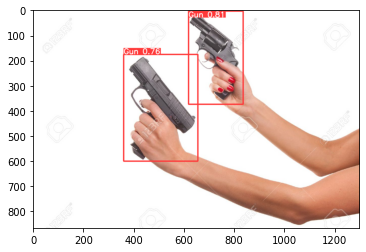

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp13/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/input.mp4 

detect: weights=['/content/yolov5/runs/train/exp13/weights/best.pt'], source=/content/yolov5/input.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/448) /content/yolov5/input.mp4: 352x640 1 Gun, 14.8ms
video 1/1 (2/448) /content/yolov5/input.mp4: 352x640 1 Gun, 9.6ms
video 1/1 (3/448) /content/yolov5/input.mp4: 352x640 1 Gun, 11.3ms
video 1/1 (4/448) /content/yolov5/input.mp4: 352x640 1 Gun, 9.4ms
video 1/1 (5/448) /content/yolov5/input.mp4: 352x640 1 Gu

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp13/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/input1.mp4 

detect: weights=['/content/yolov5/runs/train/exp13/weights/best.pt'], source=/content/yolov5/input1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/3457) /content/yolov5/input1.mp4: 384x640 (no detections), 22.0ms
video 1/1 (2/3457) /content/yolov5/input1.mp4: 384x640 (no detections), 15.3ms
video 1/1 (3/3457) /content/yolov5/input1.mp4: 384x640 (no detections), 16.3ms
video 1/1 (4/3457) /content/yolov5/input1.mp4: 384x640 (no detections), 15.2ms
video 

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp13/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/input1.mp4 

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/yolov5/input1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.8.1+cu111 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 98, in run
    model = DetectMultiBackend(weights, 

In [ ]:
import cv2

vidcap = cv2.VideoCapture()
success,image =vidcap.read()
images =[]

while(success):
    success, frame = vidcap.read()
    if success:
      image = cv2.cvtColor(image,cv2.COLOR_RGB2RGB)
      image.append(image)



In [ ]:

from matplotlib import animation , rc 
import matplotlib.pyplot as plt 

rc('animation',html='jshtml')
def creat_animation(ims):
  fig = plt.figure(figsize=(9,9))
  plt.axis=('off')
  im = plt.imshow(ims[0])
  def animate_func(i):
    im.set_array(ims[i])
    return [im]
  return creat_animation

creat_animation(images)